In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import search_around_sky
from astropy import units as u
from astropy.coordinates import SkyCoord


import os
import argparse
import logging
from os.path import join as pjoin
from astropy.io import fits
import pandas as pd

import nbodykit.lab as nblab
from nbodykit import cosmology

from tools.BOSS_FM import BOSS_angular, BOSS_veto, BOSS_redshift, BOSS_area, \
    get_nofz
from tools.utils import get_global_config, get_logger, timing_decorator

In [2]:
source_dir = '/data80/mattho/cmass-ili/borg-quijote/latin_hypercube_HR-L3000-N384/10/'
path='/data80/mattho/cmass-ili/borg-quijote/latin_hypercube_HR-L3000-N384/10/obs/rdz0.npy'

In [3]:
d=np.load(path)
d=pd.DataFrame(d, columns=['RA', 'Dec', 'Redshift'])

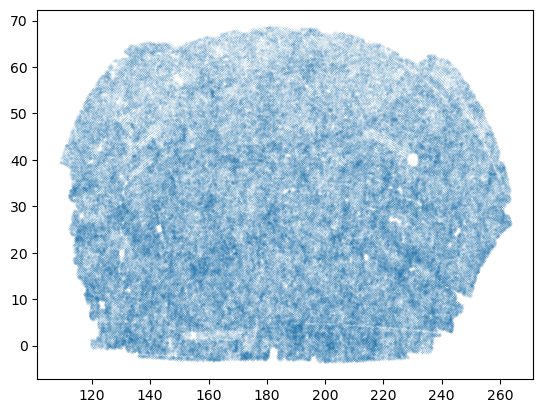

In [5]:
plt.scatter(d['RA'], d['Dec'], s=0.0005)

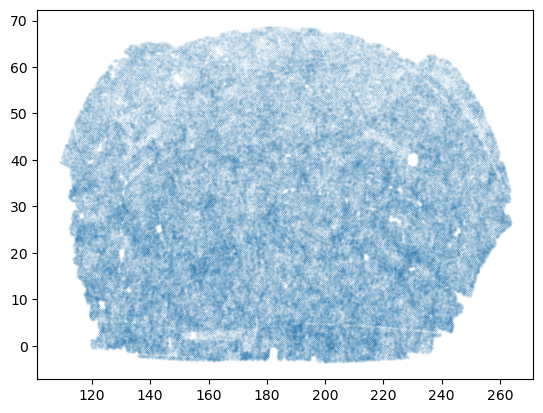

In [75]:
plt.scatter(one_removed[:,0], one_removed[:,1], s=0.0005)

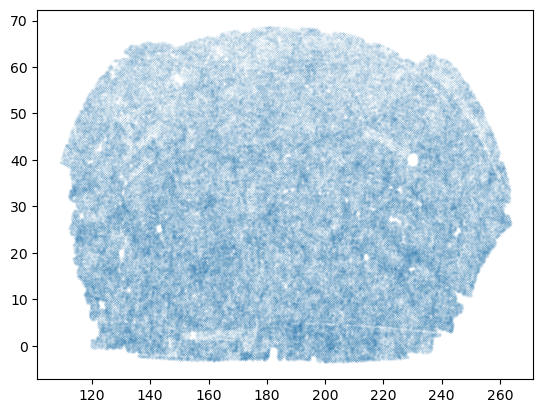

In [76]:
plt.scatter(both_removed[:,0], both_removed[:,1], s=0.0005)

In [6]:
c = SkyCoord(ra=d['RA'].values*u.degree, dec=d['Dec'].values*u.degree)
seplimit = 1/3600.*u.degree
idx1, idx2, sep2d, dist3d=search_around_sky(c,c, seplimit)

In [7]:
ridx1=idx1[idx1!=idx2]

In [8]:
ridx2=idx2[idx2!=idx1]

In [9]:
ridx1

array([ 30233,  64493, 108723, 111265, 112032, 114015, 118857, 122605,
       128564, 129020, 136034, 141459, 149223, 149672, 150505, 152038,
       154313, 167959, 168928, 169167, 172244, 172738, 179337, 185159,
       186013, 186959, 189841, 190318, 190961, 210140, 213065, 215861,
       221904, 223305, 224837, 224912, 235922, 236680, 242568, 244818,
       249560, 250820, 251350, 256054, 256590, 262654, 263410, 267487,
       268090, 268211, 268277, 269403, 270353, 271976, 272151, 273028,
       273398, 273844, 273930, 274807, 276238, 277472, 279568, 281285,
       282864, 288441, 289150, 289844, 290125, 290274, 290686, 291072,
       291375, 291666, 295063, 295391, 296291, 296924, 297967, 298363,
       299581, 300239, 300378, 300866, 301522, 301621, 303755, 304199,
       304356, 304999, 305248, 305502, 306043, 308821, 309234, 309391,
       310051, 310757, 311647, 312289, 312433, 314016, 314936, 317175,
       317595, 318764, 319754, 321536, 326375, 326404, 326540, 326554,
      

In [10]:
final_data_after_both_points_removed=d.drop(ridx1)

In [94]:
np.save('final_data_after_both_points_removed.npy', final_data_after_both_points_removed.values)

In [11]:
final_data_after_both_points_removed.values

array([[231.94612746,  41.63117251,   0.58654829],
       [174.23643316,  60.15698161,   0.60163497],
       [162.81899767,  43.29967393,   0.48359679],
       ...,
       [182.12827833,  20.56570776,   0.502047  ],
       [182.16696314,  20.5536636 ,   0.50238534],
       [182.14003319,  20.5535288 ,   0.50197051]])

In [12]:
np.array([ridx1, ridx2]).T

array([[ 30233, 309391],
       [ 64493, 510196],
       [108723, 387306],
       ...,
       [512743, 428964],
       [514202, 429278],
       [514773, 429377]])

In [15]:
np.sort(np.array([ridx1, ridx2]).T)

array([[ 30233, 309391],
       [ 64493, 510196],
       [108723, 387306],
       ...,
       [428964, 512743],
       [429278, 514202],
       [429377, 514773]])

In [113]:
np.sort(np.array([ridx1, ridx2]).T, 1)

array([[ 30233, 309391],
       [ 64493, 510196],
       [108723, 387306],
       ...,
       [428964, 512743],
       [429278, 514202],
       [429377, 514773]])

In [16]:
unique_id=np.unique(np.sort(np.array([ridx1, ridx2]).T,1), axis=0)

In [17]:
final_data_after_one_point_removed=d.drop(unique_id[:,0])

In [128]:
final_data_after_one_point_removed

,RA,Dec,Redshift
0,231.946127,41.631173,0.586548
1,174.236433,60.156982,0.601635
2,162.818998,43.299674,0.483597
3,113.312622,37.837018,0.580209
4,190.483744,27.180413,0.475921
...,...,...,...
515030,182.148220,20.626796,0.502374
515031,182.145082,20.542614,0.501667
515032,182.128278,20.565708,0.502047
515033,182.166963,20.553664,0.502385


In [129]:
final_data_after_both_points_removed

,RA,Dec,Redshift
0,231.946127,41.631173,0.586548
1,174.236433,60.156982,0.601635
2,162.818998,43.299674,0.483597
3,113.312622,37.837018,0.580209
4,190.483744,27.180413,0.475921
...,...,...,...
515030,182.148220,20.626796,0.502374
515031,182.145082,20.542614,0.501667
515032,182.128278,20.565708,0.502047
515033,182.166963,20.553664,0.502385


In [88]:
one_removed.shape

(448882, 3)

In [132]:
d1=final_data_after_both_points_removed
# final_data_after_one_point_removed
c1 = SkyCoord(ra=d1['RA'].values*u.degree, dec=d1['Dec'].values*u.degree)
seplimit = 1/3600.*u.degree
len(search_around_sky(c1,c1, seplimit)[0])

514401

In [16]:
def fibercollision_remove_both_points(path, seplimit = 1/3600. ):
    data=np.load(path)
    data=pd.DataFrame(data, columns=['RA', 'Dec', 'Redshift'])
    c = SkyCoord(ra=data['RA'].values*u.degree, dec=data['Dec'].values*u.degree)
    seplimit = seplimit*u.degree
    idx1, idx2, sep2d, dist3d=search_around_sky(c,c, seplimit)
    ridx1=idx1[idx1!=idx2]
#     ridx2=idx2[idx2!=idx1]

    final_data_after_both_points_removed=data.drop(ridx1)
    
    np.save('data/obs/final_data_after_both_points_removed.npy', final_data_after_both_points_removed.values)
    
def fibercollision_remove_one_points(path, seplimit = 1/3600. ):
    data=np.load(path)
    data=pd.DataFrame(data, columns=['RA', 'Dec', 'Redshift'])
    c = SkyCoord(ra=data['RA'].values*u.degree, dec=data['Dec'].values*u.degree)
    seplimit = seplimit*u.degree
    idx1, idx2, sep2d, dist3d=search_around_sky(c,c, seplimit)
    ridx1=idx1[idx1!=idx2]
    ridx2=idx2[idx2!=idx1]

    unique_id=np.unique(np.sort(np.array([ridx1, ridx2]).T,1), axis=0)
    final_data_after_one_point_removed=d.drop(unique_id[:,0])
    
    np.save('data/obs/final_data_after_one_point_removed.npy', final_data_after_one_point_removed.values)
    

def load_galaxies_obs(source_dir, seed):
    rdz = np.load(pjoin(source_dir, 'obs', f'rdz{seed}.npy'))
    return rdz

def load_randoms_precomputed():
    savepath = pjoin(
        'data', 'obs', 'random0_DR12v5_CMASS_North_PRECOMPUTED.npy')
    return np.load(savepath)

def sky_to_xyz(rdz, cosmo):
    return nblab.transform.SkyToCartesian(*rdz.T, cosmo)


def compute_Pk(grdz, rrdz, cosmo, weights=None):
    if weights is None:
        weights = np.ones(len(grdz))

    P0 = 1e4
    Ngrid = 360
    dk = 0.005
    Nr = len(rrdz)
    w_r = np.ones(Nr)

    gpos = sky_to_xyz(grdz, cosmo)
    rpos = sky_to_xyz(rrdz, cosmo)

    fsky = BOSS_area() / (360.**2 / np.pi)
    ng_of_z = get_nofz(grdz[:, -1], fsky, cosmo=cosmo)
    nbar_g = ng_of_z(grdz[:, -1])
    nbar_r = ng_of_z(rrdz[:, -1])

    _gals = nblab.ArrayCatalog({
        'Position': gpos,
        'NZ': nbar_g,
        'WEIGHT': weights,  # w_g,
        'WEIGHT_FKP': 1./(1. + nbar_g * P0)
    })

    _rands = nblab.ArrayCatalog({
        'Position': rpos,
        'NZ': nbar_r,
        'WEIGHT': w_r,
        'WEIGHT_FKP': 1./(1. + nbar_r * P0)
    })

    fkp = nblab.FKPCatalog(_gals, _rands)
    mesh = fkp.to_mesh(Nmesh=Ngrid, nbar='NZ', fkp_weight='WEIGHT_FKP',
                       comp_weight='WEIGHT', window='tsc')

    # compute the multipoles
    r = nblab.ConvolvedFFTPower(mesh, poles=[0, 2, 4], dk=dk, kmin=0.)

    k_gal = r.poles['k']
    p0k_gal = r.poles['power_0'].real - r.attrs['shotnoise']
    p2k_gal = r.poles['power_2'].real
    p4k_gal = r.poles['power_4'].real
    return k_gal, p0k_gal, p2k_gal, p4k_gal


In [79]:
fibercollision_remove_both_points(path, seplimit = 0.01722 )

In [80]:
fibercollision_remove_one_points(path, seplimit = 0.01722 )

In [81]:
both_removed=np.load('data/obs/final_data_after_both_points_removed.npy')
one_removed=np.load('data/obs/final_data_after_one_point_removed.npy')

In [17]:
seed=0
rdz = load_galaxies_obs(source_dir, seed)
randoms = load_randoms_precomputed()

cosmo = cosmology.Planck15

# compute P(k) for true image
k_gal, p0k_gal, p2k_gal, p4k_gal = compute_Pk(rdz, randoms, cosmo)


/home/anirban/nbodykit/nbodykit/algorithms/convpower/fkp.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  xgrid = [xx.astype('f8') + offset[ii] for ii, xx in enumerate(density2.slabs.optx)]
/home/anirban/nbodykit/nbodykit/algorithms/convpower/fkp.py:536: ComplexWarning: Casting complex values to real discards the imaginary part
  kgrid = [kk.astype('f8') for kk in cfield.slabs.optx]


In [82]:
# compute P(k) for one removed

k_gal1, p0k_gal1, p2k_gal1, p4k_gal1 = compute_Pk(one_removed, randoms, cosmo)


/home/anirban/nbodykit/nbodykit/algorithms/convpower/fkp.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  xgrid = [xx.astype('f8') + offset[ii] for ii, xx in enumerate(density2.slabs.optx)]
/home/anirban/nbodykit/nbodykit/algorithms/convpower/fkp.py:536: ComplexWarning: Casting complex values to real discards the imaginary part
  kgrid = [kk.astype('f8') for kk in cfield.slabs.optx]


In [83]:
# compute P(k) for both removed
k_gal2, p0k_gal2, p2k_gal2, p4k_gal2 = compute_Pk(both_removed, randoms, cosmo)


/home/anirban/nbodykit/nbodykit/algorithms/convpower/fkp.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  xgrid = [xx.astype('f8') + offset[ii] for ii, xx in enumerate(density2.slabs.optx)]
/home/anirban/nbodykit/nbodykit/algorithms/convpower/fkp.py:536: ComplexWarning: Casting complex values to real discards the imaginary part
  kgrid = [kk.astype('f8') for kk in cfield.slabs.optx]


In [21]:
# save results
outpath = pjoin('/home/anirban/cmass-ili/data/obs/', 'Pk')
print(outpath)
os.makedirs(outpath, exist_ok=True)
outpath = pjoin(outpath, f'Pk{seed}.npz')
logging.info(f'Saving P(k) to {outpath}...')
np.savez(outpath, k_gal=k_gal, p0k_gal=p0k_gal,
             p2k_gal=p2k_gal, p4k_gal=p4k_gal)

/home/anirban/cmass-ili/data/obs/Pk


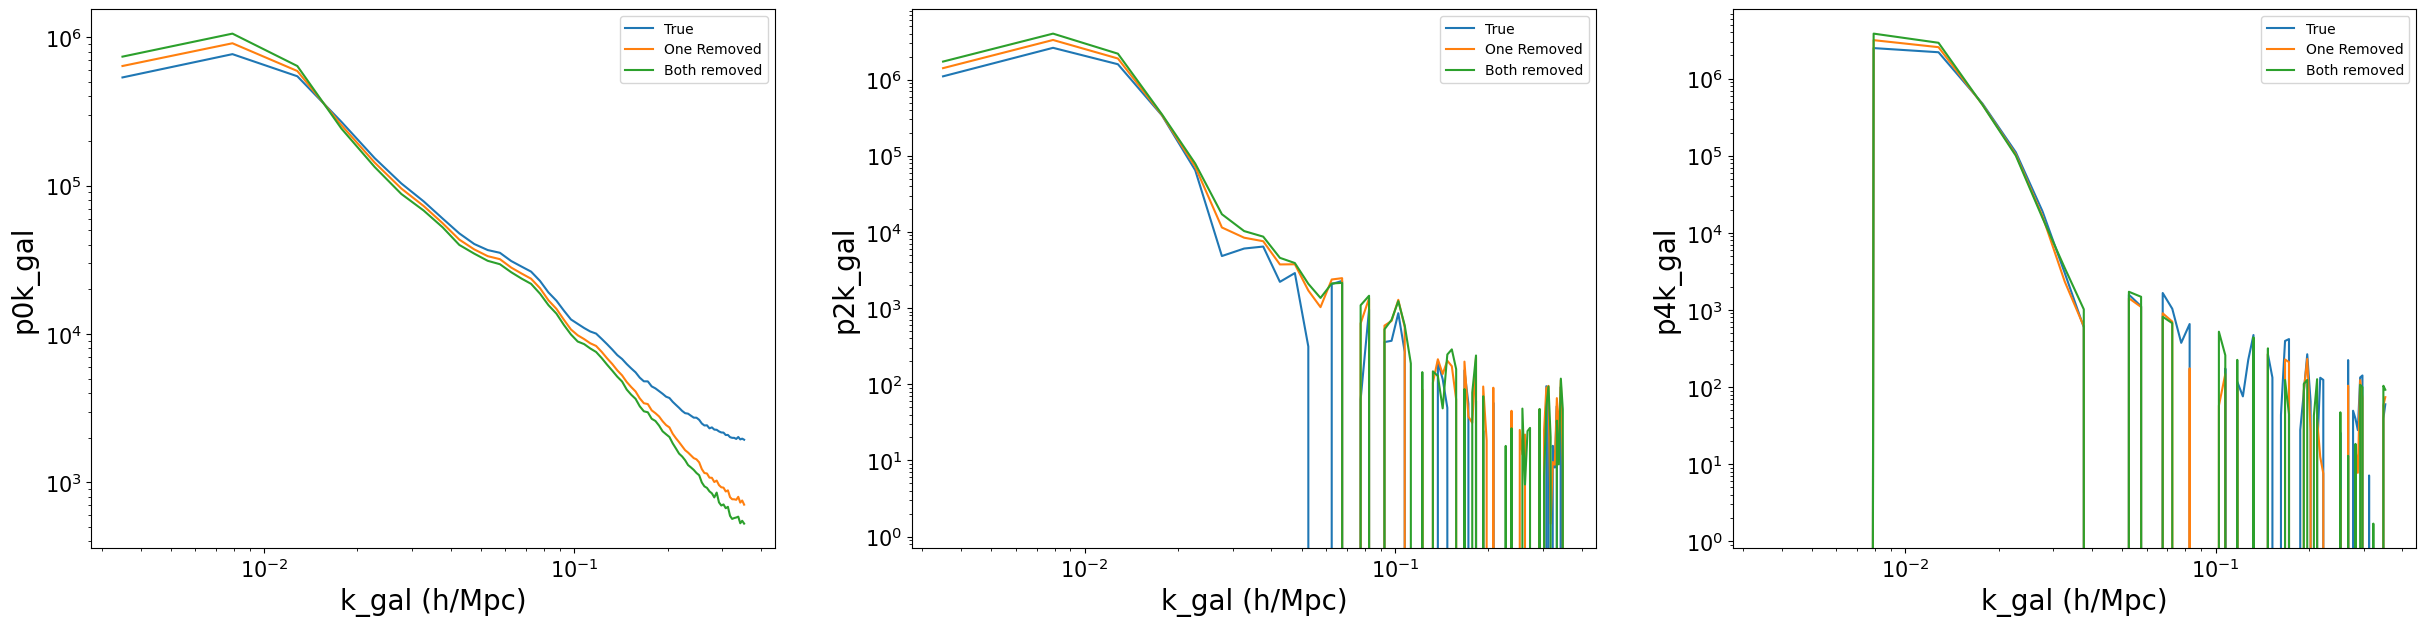

In [84]:
figure, axis = plt.subplots(1,3,figsize=(30,7))

axis[0].loglog(k_gal, p0k_gal)
axis[0].loglog(k_gal1, p0k_gal1)
axis[0].loglog(k_gal2, p0k_gal2)
axis[0].legend(['True', 'One Removed', 'Both removed'])
axis[0].set_xlabel('k_gal (h/Mpc)', fontsize = 20)
axis[0].set_ylabel('p0k_gal', fontsize = 20)
axis[0].tick_params(axis='x', labelsize=15)
axis[0].tick_params(axis='y', labelsize=15)



axis[1].loglog(k_gal,p2k_gal)
axis[1].loglog(k_gal1,p2k_gal1)
axis[1].loglog(k_gal2,p2k_gal2)
axis[1].legend(['True', 'One Removed', 'Both removed'])
axis[1].set_xlabel('k_gal (h/Mpc)', fontsize = 20)
axis[1].set_ylabel('p2k_gal', fontsize = 20)
axis[1].tick_params(axis='x', labelsize=15)
axis[1].tick_params(axis='y', labelsize=15)

axis[2].loglog(k_gal,p4k_gal)
axis[2].loglog(k_gal1,p4k_gal1)
axis[2].loglog(k_gal2,p4k_gal2)
axis[2].legend(['True', 'One Removed', 'Both removed'])
axis[2].set_xlabel('k_gal (h/Mpc)', fontsize = 20)
axis[2].set_ylabel('p4k_gal', fontsize = 20)
axis[2].tick_params(axis='x', labelsize=15)
axis[2].tick_params(axis='y', labelsize=15)


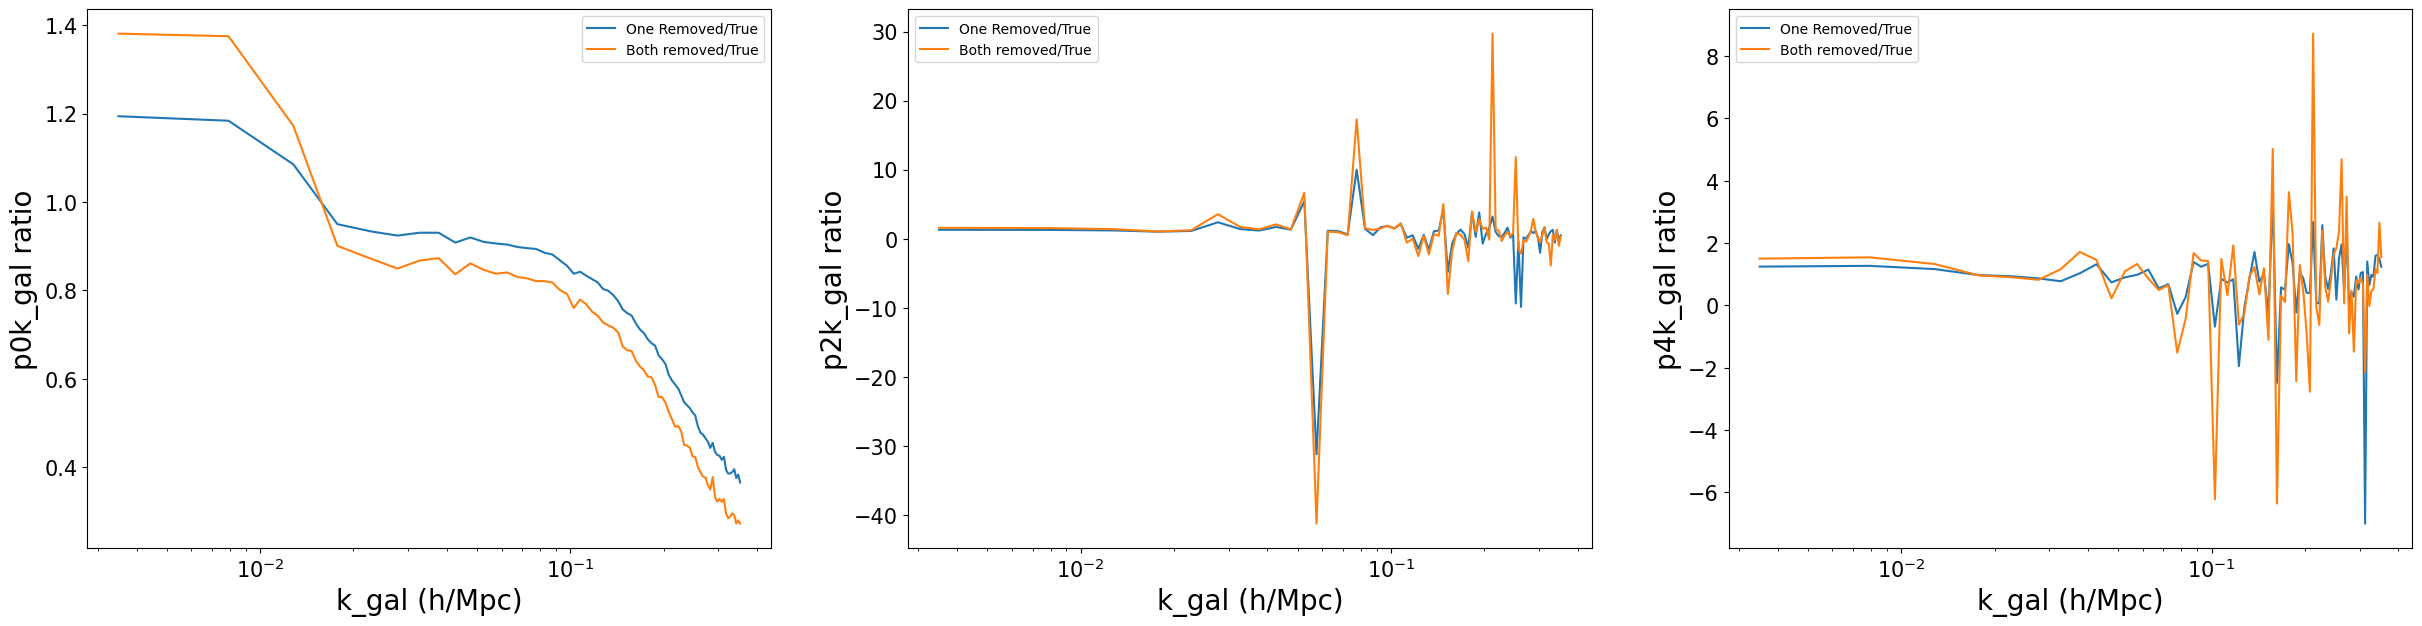

In [85]:
figure, axis = plt.subplots(1,3,figsize=(30,7))

axis[0].semilogx(k_gal, p0k_gal1/p0k_gal)
axis[0].semilogx(k_gal, p0k_gal2/p0k_gal)
axis[0].legend(['One Removed/True', 'Both removed/True'])
axis[0].set_xlabel('k_gal (h/Mpc)', fontsize = 20)
axis[0].set_ylabel('p0k_gal ratio', fontsize = 20)
axis[0].tick_params(axis='x', labelsize=15)
axis[0].tick_params(axis='y', labelsize=15)

axis[1].semilogx(k_gal,p2k_gal1/p2k_gal)
axis[1].semilogx(k_gal,p2k_gal2/p2k_gal)
axis[1].legend(['One Removed/True', 'Both removed/True'])
axis[1].set_xlabel('k_gal (h/Mpc)', fontsize = 20)
axis[1].set_ylabel('p2k_gal ratio', fontsize = 20)
axis[1].tick_params(axis='x', labelsize=15)
axis[1].tick_params(axis='y', labelsize=15)

axis[2].semilogx(k_gal,p4k_gal1/p4k_gal)
axis[2].semilogx(k_gal,p4k_gal2/p4k_gal)
axis[2].legend(['One Removed/True', 'Both removed/True'])
axis[2].set_xlabel('k_gal (h/Mpc)', fontsize = 20)
axis[2].set_ylabel('p4k_gal ratio', fontsize = 20)
axis[2].tick_params(axis='x', labelsize=15)
axis[2].tick_params(axis='y', labelsize=15)